# سوال ۱

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


برای مشاهده اطلاعات در مورد داده های دیتاست میتوان از کد بالا استفاده کرد

برای تشحیص داده های پرت نیاز داریم تا تمام دیتا ها را پلات کرده تا رفتار دیتا را مشاهده کنیم برای این کار از کد زیر استفاده می کنیم

In /home/aidin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aidin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aidin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/aidin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aidin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

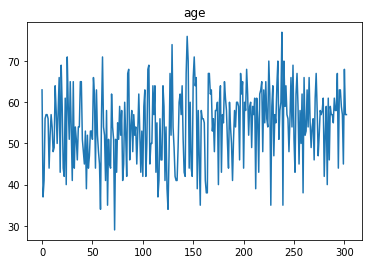

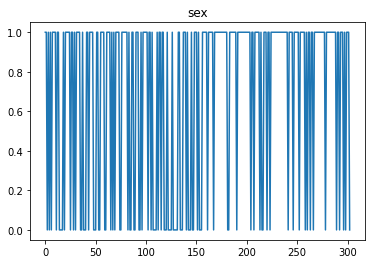

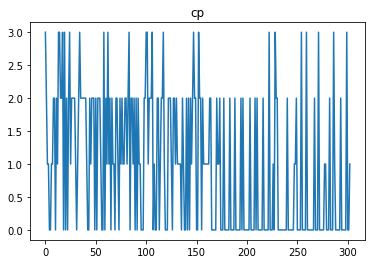

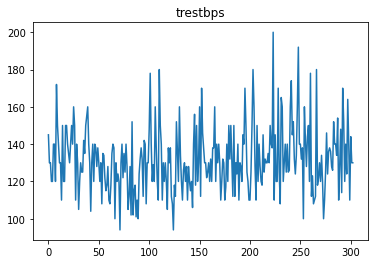

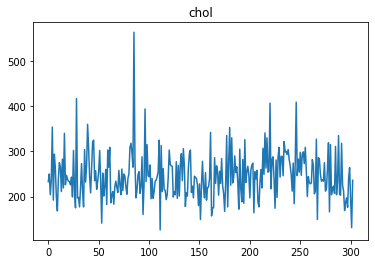

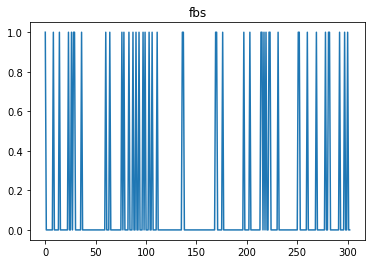

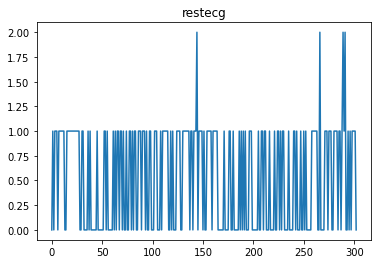

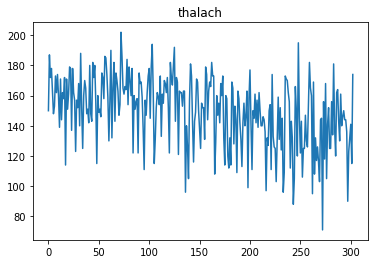

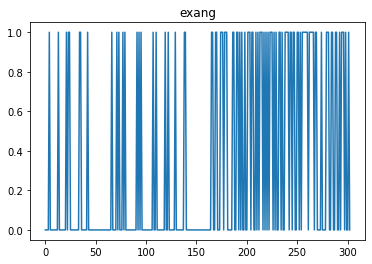

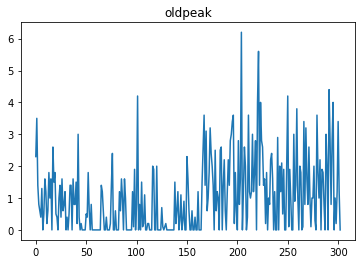

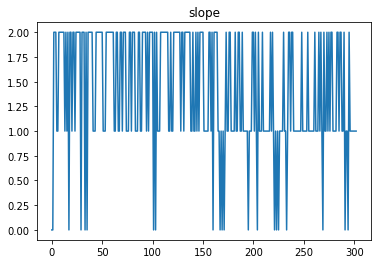

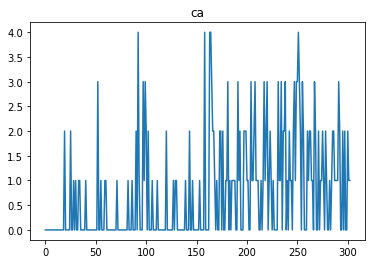

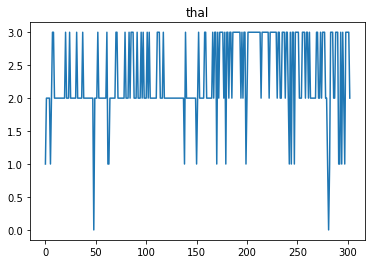

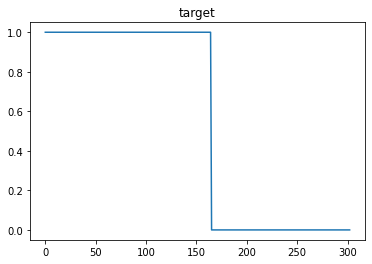

In [4]:
import matplotlib.pyplot as plt
for i in df:
    plt.plot(df[i])
    plt.title(i)
    plt.show()

برای حذف دیتا نیز با استفاده از تصاویر بالا برای ستون های مقدار عددی از کد زیر استفاده میکنیم

In [6]:
deleted=[]
for i in range(len(df)):
    if df['chol'][i]>400:#threshold
        deleted.append(i)
df = df.drop(deleted)

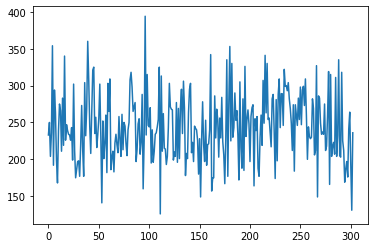

In [7]:
plt.plot(df['chol'])

همانطور که مشهود است برخی داده های پرت حذف شدند

In [8]:
labalcount0 ,labalcount1=df['target'].value_counts()
print('label-count-persent')
print(0,'-',labalcount0,'-',round(labalcount0/(labalcount0+labalcount1),2))
print(1,'-',labalcount1,'-',round(labalcount1/(labalcount0+labalcount1),2))

label-count-persent
0 - 163 - 0.55
1 - 136 - 0.45


دیتا تقریبا متوازن بوده و نسبت آن ۵۵ به ۴۵ بوده اما در صورت نامتوازن بودن میتوان از روش های افزایش دیتای کم و کاهش دیتای زیاد و یا وزن دهی به داده ها در مدل استفاده کرد 

# سوال ۲

In [9]:
from sklearn.model_selection import train_test_split
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(df.to_numpy()[:,[3,4,7]], df.to_numpy()[:,-1], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.to_numpy()[:,0:-1], df.to_numpy()[:,-1], test_size=0.2, random_state=42)

# سوال۳

قضیه بیز روشی برای دسته‌بندی پدیده‌ها، بر پایه احتمال وقوع یا عدم وقوع یک پدیده‌است و در نظریه احتمالات با اهمیت و پرکاربرد است. اگر برای فضای نمونه‌ای مفروضی بتوانیم چنان افرازی انتخاب کنیم که با دانستن اینکه کدامیک از پیشامدهای افراز شده رخ داده‌است، بخش مهمی از عدم قطعیت تقلیل می‌یابد.

این قضیه از آن جهت مفید است که می‌توان از طریق آن، احتمال یک پیشامد را با مشروط کردن نسبت به وقوع یا عدم وقوع یک پیشامد دیگر محاسبه کرد. در بسیاری از حالت‌ها، محاسبهٔ احتمال یک پیشامد به صورت مستقیم کاری دشوار است. با استفاده از این قضیه و مشروط کردن پیشامد مورد نظر نسبت به پیشامد دیگر، می‌توان احتمال مورد نظر را محاسبه کرد.
به طور کلی در پردازش متن تشخیص هرزنامه سیستم های توصیه گر و تحلیل احساسات کاربرد دارد

Gaussian Naive Bayes
اگر مشاهدات و داده‌ها از نوع پیوسته باشند، از مدل احتمالی با توزیع گاوسی یا نرمال برای متغیرهای مربوط به شواهد می‌توانید استفاده کنید. در این حالت هر دسته یا گروه دارای توزیع گاوسی است. به این ترتیب اگر k دسته یا کلاس داشته باشیم می‌توانیم برای هر دسته میانگین و واریانس را محاسبه کرده و پارامترهای توزیع نرمال را برای آن‌ها برآورد کنیم.

Multinomial Naive Bayes
بیز ساده چندجمله‌ای، به عنوان یک دسته‌بند متنی بسیار به کار می‌آید. در این حالت برحسب مدل احتمالی یا توزیع چند جمله‌ای، برداری از n ویژگی برای یک مشاهده به صورت X=(x1,…,xn) با احتمالات  (p1,…,pn) در نظر گرفته می‌شود. مشخص است که در این حالت بردار X بیانگر تعداد مشاهداتی است که ویژگی خاصی را دارا هستند.

Bernoulli Naive Bayes
این نوع از دسته‌بند بیز بیشترین کاربرد را در دسته‌بندی متن‌های کوتاه داشته، به همین دلیل محبوبیت بیشتری نیز دارد. در این مدل در حالت چند متغیره، فرض بر این است که وجود یا ناموجود بودن یک ویژگی در نظر گرفته شود. برای مثال با توجه به یک لغتنامه مربوط به اصطلاحات ورزشی، متن دلخواهی مورد تجزیه و تحلیل قرار می‌گیرد و بررسی می‌شود که آیا کلمات مربوط به لغتنامه ورزشی در متن وجود دارند یا خیر.

# سوال۴

In [10]:
import numpy as np
import math 
class gaussClf:
    def separate_by_classes(self, X, y):
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets
    def fit(self, X, y):
        separated_X = self.separate_by_classes(X, y)
        self.means = {}
        self.std = {}
        for class_type in self.classes:
            # Here we calculate the mean and the standart deviation from datasets
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
    def calculate_probability(self, x, mean, stdev):
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    def predict_proba(self, X):
        self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
        for cls in self.classes:
            for i in range(len(self.means)):
                self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
        self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
        return self.class_prob
    def predict(self, X):
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            for cls, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

# سوال ۵

In [11]:
from sklearn.metrics import classification_report
nb = gaussClf()
nb.fit(X_train_small, y_train_small)
y_pred = nb.predict(X_test_small)
print(classification_report(y_pred,y_test_small))

              precision    recall  f1-score   support

         0.0       0.08      0.40      0.14         5
         1.0       0.92      0.60      0.73        55

    accuracy                           0.58        60
   macro avg       0.50      0.50      0.43        60
weighted avg       0.85      0.58      0.68        60



# سوال ۶

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
clf = GaussianNB()
clf.fit(X_train_small, y_train_small)
y_pred = clf.predict(X_test_small)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61        22
         1.0       0.78      0.74      0.76        38

    accuracy                           0.70        60
   macro avg       0.68      0.69      0.68        60
weighted avg       0.71      0.70      0.70        60



# سوال ۷

مدل پیاده سازی شده در یافتن لیبیل های صفر عمرکرد خوبی ندارد
اما در نمونه سایکیت لرن به خپبی عمل کرده است اما برای لیبل یک نتایج تقریبا نزدیک به یکدیگر هستند

# سوال ۸

In [13]:
from sklearn import svm
from sklearn.metrics import classification_report
clf = svm.SVC()
clf.fit(X_train_small, y_train_small)
y_pred = clf.predict(X_test_small)
print(classification_report(y_pred,y_test_small))

              precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        20
         1.0       0.78      0.70      0.74        40

    accuracy                           0.67        60
   macro avg       0.64      0.65      0.64        60
weighted avg       0.69      0.67      0.67        60



# سوال۹

In [14]:
from sklearn import svm
from sklearn.metrics import classification_report
clf = svm.SVC(kernel='linear')
clf.fit(X_train_small, y_train_small)
y_pred = clf.predict(X_test_small)
print('linear')
print(classification_report(y_pred,y_test_small))

linear
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        24
         1.0       0.78      0.78      0.78        36

    accuracy                           0.73        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60



In [15]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train_small, y_train_small)
y_pred = clf.predict(X_test_small)
print('poly')
print(classification_report(y_pred,y_test_small))

poly
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62        24
         1.0       0.75      0.75      0.75        36

    accuracy                           0.70        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60



نتایج کرنل ها متفاوت شدند و الگوریتم های SVM از مجموعه ای از توابع ریاضی که به عنوان کرنل تعریف می شوند، استفاده می کنند. وظیفه کرنل این است که داده ها را به عنوان ورودی گرفته و آن ها را به شکل مورد نیاز تبدیل کند. الگوریتم های مختلف SVM ، از انواع مختلف توابع کرنل استفاده می کنند. این توابع می توانند انواع متفاوتی داشته باشند. به عنوان مثال خطی ، غیرخطی ، چند جمله ای ، تابع پایه شعاعی  و سیگموئید میباشد که پیش فرض سایکیت تابع پایه شعاعی میباشد.

# سوال۱۰

In [16]:
from sklearn import svm
from sklearn.metrics import classification_report , precision_score,recall_score,f1_score
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.50      0.63      0.56        19
         1.0       0.81      0.71      0.75        41

    accuracy                           0.68        60
   macro avg       0.65      0.67      0.66        60
weighted avg       0.71      0.68      0.69        60



# سوال۱۱

In [17]:
from sklearn.model_selection import KFold
K = 1
X = df.to_numpy()[:,0:-1]
y = df.to_numpy()[:,-1]
clf = svm.SVC()
cv = KFold(n_splits=5, shuffle=False)
for train_index, test_index in cv.split(X):
    print(K,' Fold')
    X_train_, X_test_, y_train_, y_test_ = X[train_index], X[test_index], y[train_index], y[test_index]
    clf.fit(X_train_, y_train_)
    y_pred = clf.predict(X_test)
    print('precision_score',round(precision_score(y_pred,y_test),2))
    print('recall_score',round(recall_score(y_pred,y_test),2))
    print('f1_score',round(f1_score(y_pred,y_test),2))
    K+=1

1  Fold
precision_score 0.53
recall_score 0.95
f1_score 0.68
2  Fold
precision_score 0.56
recall_score 0.87
f1_score 0.68
3  Fold
precision_score 0.75
recall_score 0.77
f1_score 0.76
4  Fold
precision_score 1.0
recall_score 0.6
f1_score 0.75
5  Fold
precision_score 1.0
recall_score 0.6
f1_score 0.75


# سوال۱۲

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
clf = KNeighborsClassifier(n_neighbors=63)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.25      0.46      0.32        13
         1.0       0.81      0.62      0.70        47

    accuracy                           0.58        60
   macro avg       0.53      0.54      0.51        60
weighted avg       0.69      0.58      0.62        60



# سوال۱۳

6


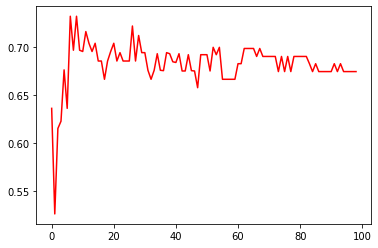

In [19]:
tests = []
from sklearn.metrics import f1_score
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tests.append(f1_score(y_pred,y_test))
plt.plot(tests,'r')
print(np.argmax(tests))

شهود ترین نوع نزدیکترین همسایه در حالت طبق بندی، تنها نزدیکترین همسایه است که یک نقطه را به کلاس نزدیکترین همسایه خوداختصاص میدهد تعداد همسایه ها بستگی به هر دیتا ست دارد و به صورت شهودی تعیین میگردد مانند مثال بالا در مثال بالا ۶ بهترین همسایگیست

# سوال۱۴

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
clf = KNeighborsClassifier(n_neighbors=63)
clf.fit(X_train_small, y_train_small)
y_pred = clf.predict(X_test_small)
print(classification_report(y_pred,y_test_small))

              precision    recall  f1-score   support

         0.0       0.25      0.46      0.32        13
         1.0       0.81      0.62      0.70        47

    accuracy                           0.58        60
   macro avg       0.53      0.54      0.51        60
weighted avg       0.69      0.58      0.62        60



# سوال۱۵

 روش های پارامتری
روش ها بر اساس آنچه که ما در مورد جمعیت ما در حال مطالعه می دانیم طبقه بندی می شوند. روش های پارامتریک معمولا اولین روش هایی است که در دوره آمار مقدماتی مورد مطالعه قرار می گیرند. ایده اصلی این است که مجموعه ای از پارامترهای ثابت وجود دارد که یک مدل احتمالی را تعیین می کنند. 

 برای مقابله با روش های پارامتری، روش های غیر پارامتری را تعریف می کنیم. اینها تکنیک های آماری هستند که ما برای انجام هر گونه پیش فرض پارامترهای جمعیتی که در حال تحصیل هستند را نداریم.
در واقع، روش ها وابسته به جمعیت مورد علاقه نیستند. مجموعه ای از پارامترها ثابت نشده است و توزیعی نیست که ما استفاده می کنیم. به همین دلیل روش های غیر پارامتری نیز به عنوان روش های توزیع آزاد نامیده می شود. 

# سوال۱۶

MCC: پارامتر دیگری است که برای ارزیابی کارایی الگوریتم‌های یادگیری ماشین از آن استفاده می‌شود. این پارامتر بیان‌گر کیفیت کلاس‌بندی برای یک مجموعه باینری می‌باشد. (سنجه‌ای است که بیان‌گر بستگی مابین مقادیر مشاهده شده از کلاس باینری و مقادیر پیش‌بینی شده از آن می‌باشد. مقادیر مورد انتظار برای این کمیت در بازه 1- و 1 متغیر می‌باشد. مقدار 1+، نشان دهنده پیش‌بینی دقیق و بدون خطای الگوریتم یادگیر از کلاس باینری می‌باشد. مقدار 0، نشان دهنده پیش‌بینی تصادفی الگوریتم یادگیر از کلاس باینری می‌باشد. مقدار 1-، نشان دهنده عدم تطابق کامل مابین موارد پیش‌بینی شده از کلاس باینری و موارد مشاهده شده از آن می‌باشد. مقدار این پارامتر را به‌طور صریح، با توجه به مقادیر ماتریس آشفتگی به شرح زیر، می‌توان محاسبه نمود:

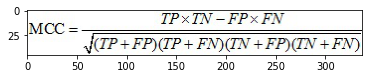

In [21]:
plt.imshow(plt.imread('MCC.jpg'))